In [1]:
import os
import cv2
import glob
import random
import imageio
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import skimage.measure   
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.morphology import disk
from skimage.util import img_as_ubyte

In [7]:
train_glioma = glob.glob('Brain Tumor Classification Dataset/Training/glioma_tumor/*.jpg')
train_menignioma = glob.glob('Brain Tumor Classification Dataset/Training/meningioma_tumor/*.jpg')
train_pituitary = glob.glob('Brain Tumor Classification Dataset/Training/pituitary_tumor/*.jpg')
train_no = glob.glob('Brain Tumor Classification Dataset/Training/no_tumor/*.jpg')

# #Test
test_glioma = glob.glob('Brain Tumor Classification Dataset/Testing/glioma_tumor/*.jpg')
test_menignioma = glob.glob('Brain Tumor Classification Dataset/Testing/meningioma_tumor/*.jpg')
test_pituitary = glob.glob('Brain Tumor Classification Dataset/Testing/pituitary_tumor/*.jpg')
test_no = glob.glob('Brain Tumor Classification Dataset/Testing/no_tumor/*.jpg')



In [8]:
train_glioma_number = len(train_glioma)
train_menignioma_number = len(train_menignioma)
train_pituitary_number = len(train_pituitary)
train_no_number = len(train_no)

test_glioma_number = len(test_glioma)
test_menignioma_number = len(test_menignioma)
test_pituitary_number = len(test_pituitary)
test_no_number = len(test_no)

print("Number of train_glioma: ",train_glioma_number)
print("Number of train_menignioma: ",train_menignioma_number)
print("Number of train_pituitary: ",train_pituitary_number)
print("Number of train_no: ",train_no_number)
print("Number of test_glioma: ",test_glioma_number)
print("Number of test_menignioma: ",train_menignioma_number)
print("Number of test_pituitary: ",train_pituitary_number)
print("Number of test_no: ",train_no_number)

Number of train_glioma:  826
Number of train_menignioma:  822
Number of train_pituitary:  827
Number of train_no:  395
Number of test_glioma:  100
Number of test_menignioma:  822
Number of test_pituitary:  827
Number of test_no:  395


In [13]:
def images_visualization(image, title,a, save_fig=True):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = mpimg.imread(random_image_path)
        plt.subplot(1, a, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(title)
    if save_fig:
        file = 'Grid Normal Image.png'
        plt.savefig(file)
    plt.show()

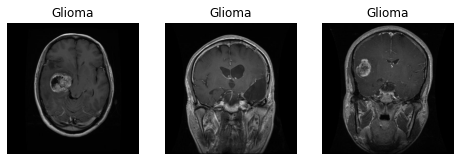

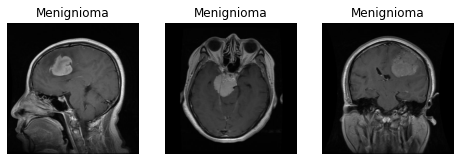

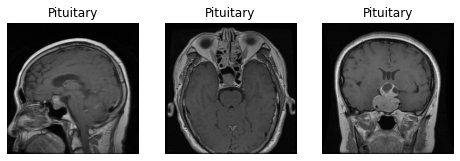

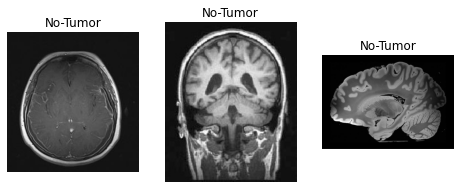

In [14]:

np.random.seed(10)
images_visualization(train_glioma, 'Glioma',3)
images_visualization(train_menignioma, 'Menignioma',3)
images_visualization(train_pituitary, 'Pituitary',3)
images_visualization(train_no, 'No-Tumor',3)

In [20]:
def grid_clahe(image, title,a, save_fig=True):#a=number of images
    plt.figure(figsize=(8,8))#image size
    for i in range(a):#number of image
        random_image_path = random.choice(image)#random selection
        img = cv2.imread(random_image_path) # read the image using cv2
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale
        clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
        clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image
        plt.subplot(1, a, i+1)
        plt.imshow(clahe_img, cmap='gray') # display the filtered image using plt.imshow and cmap='grey'
        plt.axis('off')
        plt.title(title)
    if save_fig:
        file = 'Grid CLAHE Image.png'
        plt.savefig(file)
    plt.show()

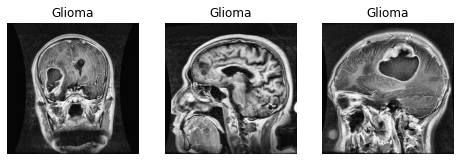

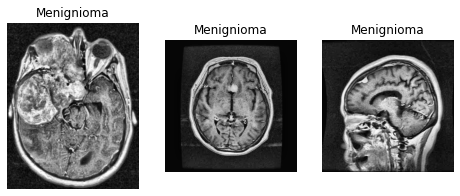

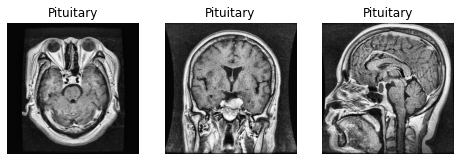

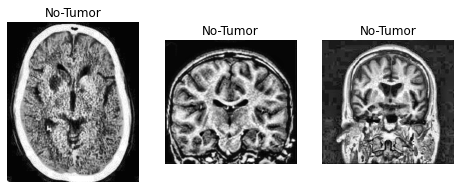

In [21]:
grid_clahe(train_glioma, 'Glioma',3)
grid_clahe(train_menignioma, 'Menignioma',3)
grid_clahe(train_pituitary, 'Pituitary',3)
grid_clahe(train_no,'No-Tumor',3)

In [23]:
def BCET(Gmin, Gmax, Gmean, img):
    #Grayscale    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    #Converting to numpy type
    x =img_gray.astype(float)
    
    #Get Some values from image     
    Lmin = np.min(x)     
    Lmax = np.max(x)     
    Lmean = np.mean(x)   
    LMssum = np.mean(x**2)  
    
    #Math count
    
    bnum = Lmax**2*(Gmean-Gmin) - LMssum*(Gmax-Gmin) + Lmin**2*(Gmax-Gmean)
    bden = 2*(Lmax*(Gmean-Gmin) - Lmean*(Gmax-Gmin) + Lmin*(Gmax-Gmean))

    b = bnum / bden

    a = (Gmax-Gmin) / ((Lmax-Lmin)*(Lmax+Lmin-2*b))

    c = Gmin - a*(Lmin-b)**2

    #Parabolic function     
    y = a*(x-b)**2 + c  
    y = np.uint8(y)   


    return y

In [24]:
def plot_BCET (image, title,a, Gmin, Gmax, Gmean):
    plt.figure(figsize=(8,8))
    for i in range(a):
        random_image_path = random.choice(image)
        img = cv2.imread(random_image_path)
        BCET_img = BCET(Gmin, Gmax, Gmean, img)
        plt.subplot(1, a, i+1)
        plt.imshow(BCET_img, cmap="gray")
        plt.axis('off')
        plt.title(title)
    plt.show()

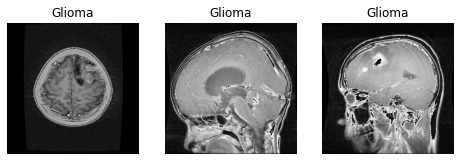

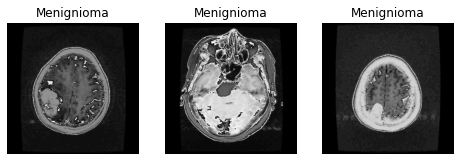

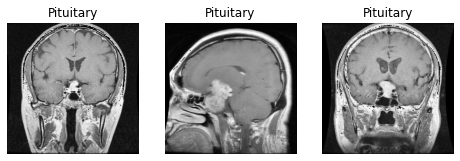

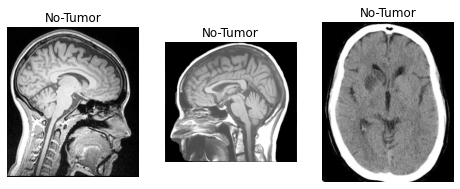

In [25]:
plot_BCET(train_glioma, 'Glioma', 3, 0, 255, 110)
plot_BCET(train_menignioma, 'Menignioma', 3, 0, 255, 110)
plot_BCET(train_pituitary, 'Pituitary', 3, 0, 255, 110)
plot_BCET(train_no, 'No-Tumor', 3, 0, 255, 110)


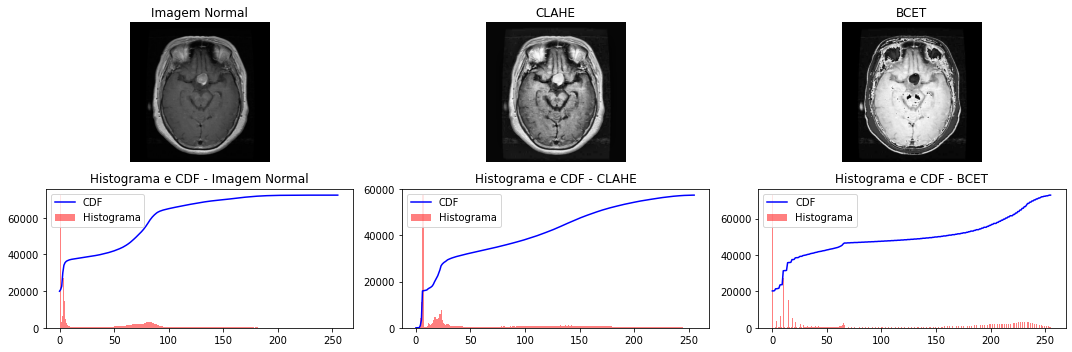

In [26]:
# IMAGEM : pituitary_tumor/p (721).jpg
# Plotando a mesma imagem com e sem os filtros
random.seed(12)
glioma = random.choice(train_pituitary)#random selection
img = cv2.imread(glioma) # read the image using cv2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the image to grayscale

# ------- CLAHE -------

clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(8,8)) # create a CLAHE object with clip limit and tile grid size
clahe_img = clahe.apply(img_gray) # apply CLAHE to the grayscale image

# -------- BCET -------
bcet_img = BCET(0, 255, 110, img)


fig, axes = plt.subplots(2, 3, figsize=(15,5))

# Subplot 1 (normal)
axes[0,0].imshow(img_gray, cmap = 'gray')
axes[0,0].set_title("Imagem Normal")
axes[0,0].axis('off')
 

# Calcule o histograma e CDF da primeira imagem
hist1, bins1 = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
cdf1 = hist1.cumsum()
cdf_normalized1 = cdf1 * hist1.max() / cdf1.max()
axes[1, 0].plot(cdf_normalized1, color='b')
axes[1, 0].hist(img_gray.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 0].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 0].set_title('Histograma e CDF - Imagem Normal')

    
# Subplot 2 (clahe)
axes[0,1].imshow(clahe_img, cmap = 'gray')
axes[0,1].set_title("CLAHE")
axes[0,1].axis('off')



# Calcule o histograma e CDF da imagem com filtro CLAHE

hist2, bins2 = np.histogram(clahe_img.flatten(), bins=256, range=[0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()

axes[1, 1].plot(cdf_normalized2, color='b')
axes[1, 1].hist(clahe_img.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 1].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 1].set_title('Histograma e CDF - CLAHE')

# Repita o processo para a terceira imagem
axes[0, 2].imshow(bcet_img, cmap='gray')
axes[0, 2].set_title('BCET')
axes[0, 2].axis('off')

hist3, bins3 = np.histogram(bcet_img.flatten(), bins=256, range=[0, 256])
cdf3 = hist3.cumsum()
cdf_normalized3 = cdf3 * hist3.max() / cdf3.max()

axes[1, 2].plot(cdf_normalized3, color='b')
axes[1, 2].hist(bcet_img.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
axes[1, 2].legend(['CDF', 'Histograma'], loc='upper left')
axes[1, 2].set_title('Histograma e CDF - BCET')


name = glioma.split('/')
plt.savefig('Imagem Filtrada com Histograma {} {}.png'.format(name[-2], name[-1]), dpi = 300)


# Exiba a figura
plt.tight_layout()
plt.show()



In [31]:

def plot_clahe(dataset, samples, seed, n_min = 0.1, n_max=5, save_img = False, histogram=True):
    """
    This function plots some images applying CLAHE image enhancement within a range 
    equally spaced between n_min and n_max to set the clip limit in the CLAHE function.

    Args:
        dataset (string): The path where all images are located.
        samples (int): The number of samples to plot.
        seed (int): A number to ensure consistent image selection.
        n_min (float): The minimum value to set the clip limit in the CLAHE function.
        n_max (float): The maximum value to set the clip limit in the CLAHE function.
        save_img (bool): Save the image in the following path 'current_dir/CLAHE Images/...'
        histogram (bool): Plot the histogram beside the enhanced image.

    Returns:
        None
        """
    #Seed:     
    random.seed(seed)
    
    #Get an image from the random dataset     
    image = cv2.imread(random.choice(dataset))#random selection

    #Converting to grayscale     
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    array_np = np.linspace(n_min, n_max, samples)

    for i, value in enumerate(array_np):
        #Applying CLAHE enhancement          
        clahe = cv2.createCLAHE(clipLimit=value, tileGridSize=(8,8))
        clahe_img = clahe.apply(img_gray) 
    
        title = 'Clip Limit Value: {:.2f}\n Index: {}\n Kernel=8x8'.format(value,i)
        
        if(histogram):
            fig, axes = plt.subplots(1, 2, figsize=(12,5))
            hist, bins = np.histogram(clahe_img.flatten(), bins=256, range=[0, 256])
            cdf = hist.cumsum()
            cdf_normalized = cdf * hist.max() / cdf.max()
            
            for i in range(2):
                axes[i].set_facecolor('white')
                if i==0:
                    axes[i].set_title(title)
                    axes[i].imshow(clahe_img, cmap='gray')
                    axes[i].axis('off')
                else:
                    title = 'Histogram \n' + title
                    axes[i].set_title(title)
                    axes[i].hist(clahe_img.flatten(), bins=256, range=[0,256], color='r', alpha=0.5)
                    axes[i].plot(cdf_normalized, color='b') 
                    axes[i].legend(['CDF', 'Histograma'], loc='upper left')
            
            #Without histogram             
        else:
            plt.figure(figsize=(16,8));
            plt.figure(i+1, facecolor='white');
            plt.imshow(clahe_img, cmap='gray');
            plt.title(title)
        
        #Adjust layout to fit images         
        plt.tight_layout()
    
        # Saving the images         
        if save_img:
            path = 'CLAHE Images'
            if not os.path.exists(path):
                os.makedirs(path)
            plt.savefig('{}/Clahe {}.jpg'.format(path, title), dpi = 300)    
        
        plt.show()

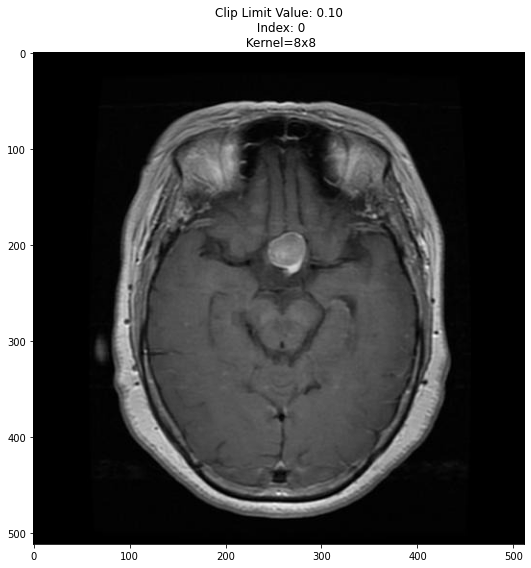

<Figure size 1152x576 with 0 Axes>

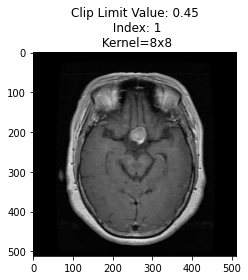

<Figure size 1152x576 with 0 Axes>

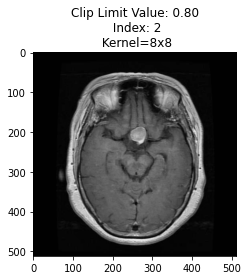

<Figure size 1152x576 with 0 Axes>

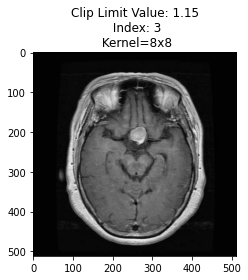

<Figure size 1152x576 with 0 Axes>

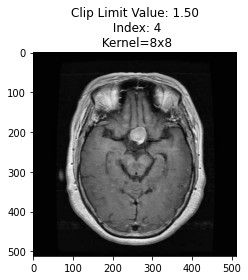

<Figure size 1152x576 with 0 Axes>

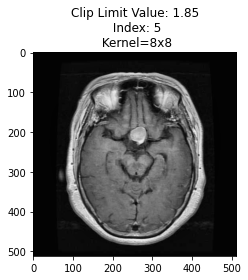

<Figure size 1152x576 with 0 Axes>

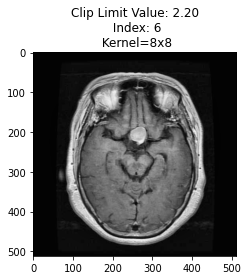

<Figure size 1152x576 with 0 Axes>

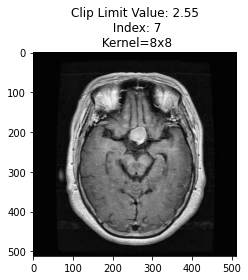

<Figure size 1152x576 with 0 Axes>

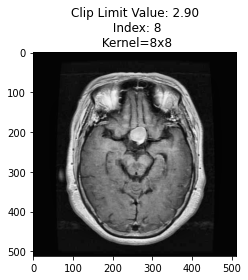

<Figure size 1152x576 with 0 Axes>

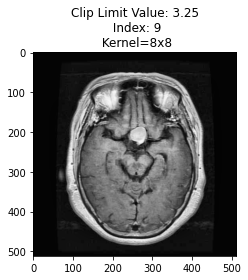

<Figure size 1152x576 with 0 Axes>

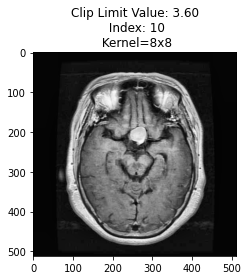

<Figure size 1152x576 with 0 Axes>

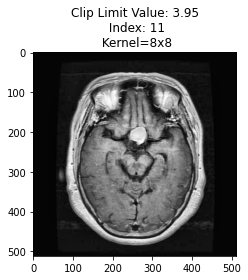

<Figure size 1152x576 with 0 Axes>

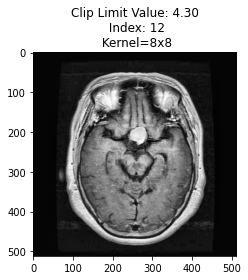

<Figure size 1152x576 with 0 Axes>

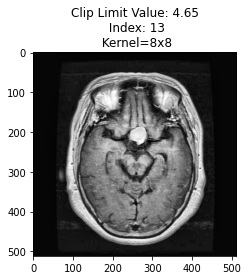

<Figure size 1152x576 with 0 Axes>

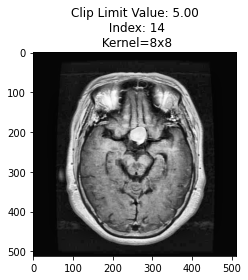

In [33]:
plot_clahe(train_pituitary, 15, 12, save_img = True, histogram=False)